In [1]:
import pandas as pd
import numpy as np

In [2]:
excel = pd.read_excel("Reviews-Asmi.xlsx")

In [3]:
table_rating = excel.rename(columns={'reviewerName': 'User','categories': 'Product'})

In [4]:
table_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   rating                1200 non-null   int64 
 1   User                  1200 non-null   object
 2   Product               1200 non-null   object
 3   gPlusPlaceId          1200 non-null   object
 4   unixReviewTime        1200 non-null   object
 5   reviewTime            1200 non-null   object
 6   gPlusUserId           1200 non-null   object
 7   reviews/categories/1  552 non-null    object
 8   reviews/categories/2  294 non-null    object
dtypes: int64(1), object(8)
memory usage: 84.5+ KB


In [5]:
table_rating[table_rating["Product"]=="None"]

,rating,User,Product,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,reviews/categories/1,reviews/categories/2
11,5,Satoko Morita,None,117582951880076136638,1390652445,"Jan 25, 2014",100000021336848867366,NaN,NaN
12,5,amey kore,None,111478860057135750881,1340897319,"Jun 28, 2012",100000030557048145331,NaN,NaN
43,5,braulio cedeno,None,113240070108789076427,None,None,100000086464175716262,NaN,NaN
44,3,Anatolii Reva,None,107675435715719009471,None,None,100000090118187219304,NaN,NaN
72,1,LaToya Millet,None,101448828545975245609,None,None,100000143882645733879,NaN,NaN
109,5,Ana Coronado,None,115853778952012629345,None,None,100000213681774047964,NaN,NaN
110,5,‫فل لف‬‎,None,116112707919496771498,1383161633,"Oct 30, 2013",100000216333302587072,NaN,NaN
179,5,Umesh Kesavan,None,117658138056609696758,None,None,100000247457051790110,NaN,NaN
191,5,Daniel Destouche,None,103232580132916367551,None,None,100000262161472088687,NaN,NaN
215,5,Norazlin Daud,None,108440788813665451575,None,None,100000314088476173282,NaN,NaN


In [6]:
table_rating_new = table_rating.groupby(['User', 'Product'] , as_index=False).agg({'rating': ['mean']})

In [7]:
table_delete_None = table_rating_new[table_rating_new["Product"]!="None"]

In [9]:
matrice_rating = pd.pivot_table(table_delete_None,index=["User"],columns=['Product'], values=['rating']).fillna(0)

C:\Users\abdo\anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [10]:
multiplication_vector = matrice_rating.dot(matrice_rating.T)
norm_user = np.sqrt((matrice_rating**2).sum(axis = 1))
matrice_norm = np.outer(norm_user, norm_user)
matrice_similarite_cacul = multiplication_vector/matrice_norm

In [ ]:
pip install networkx

In [11]:
import networkx as nx
G = nx.Graph()

In [12]:
G = nx.from_pandas_adjacency(matrice_similarite_cacul)

In [13]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 441\nNumber of edges: 4728\nAverage degree:  21.4422'

In [14]:
FG = nx.Graph()

In [15]:
for n, nbrs in G.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt > 0.85 and n != nbr : FG.add_weighted_edges_from([(n, nbr, wt)]) 

In [16]:
# FG.edges(data=True)
FG.order()

177

In [17]:
nx.info(FG)

'Name: \nType: Graph\nNumber of nodes: 177\nNumber of edges: 563\nAverage degree:   6.3616'

In [18]:
# https://www.kaggle.com/mayeesha/network-analysis-for-dummies-stackoverflow-data
# https://networkx.org/documentation/stable/tutorial.html#attributes

import matplotlib.pyplot as plt

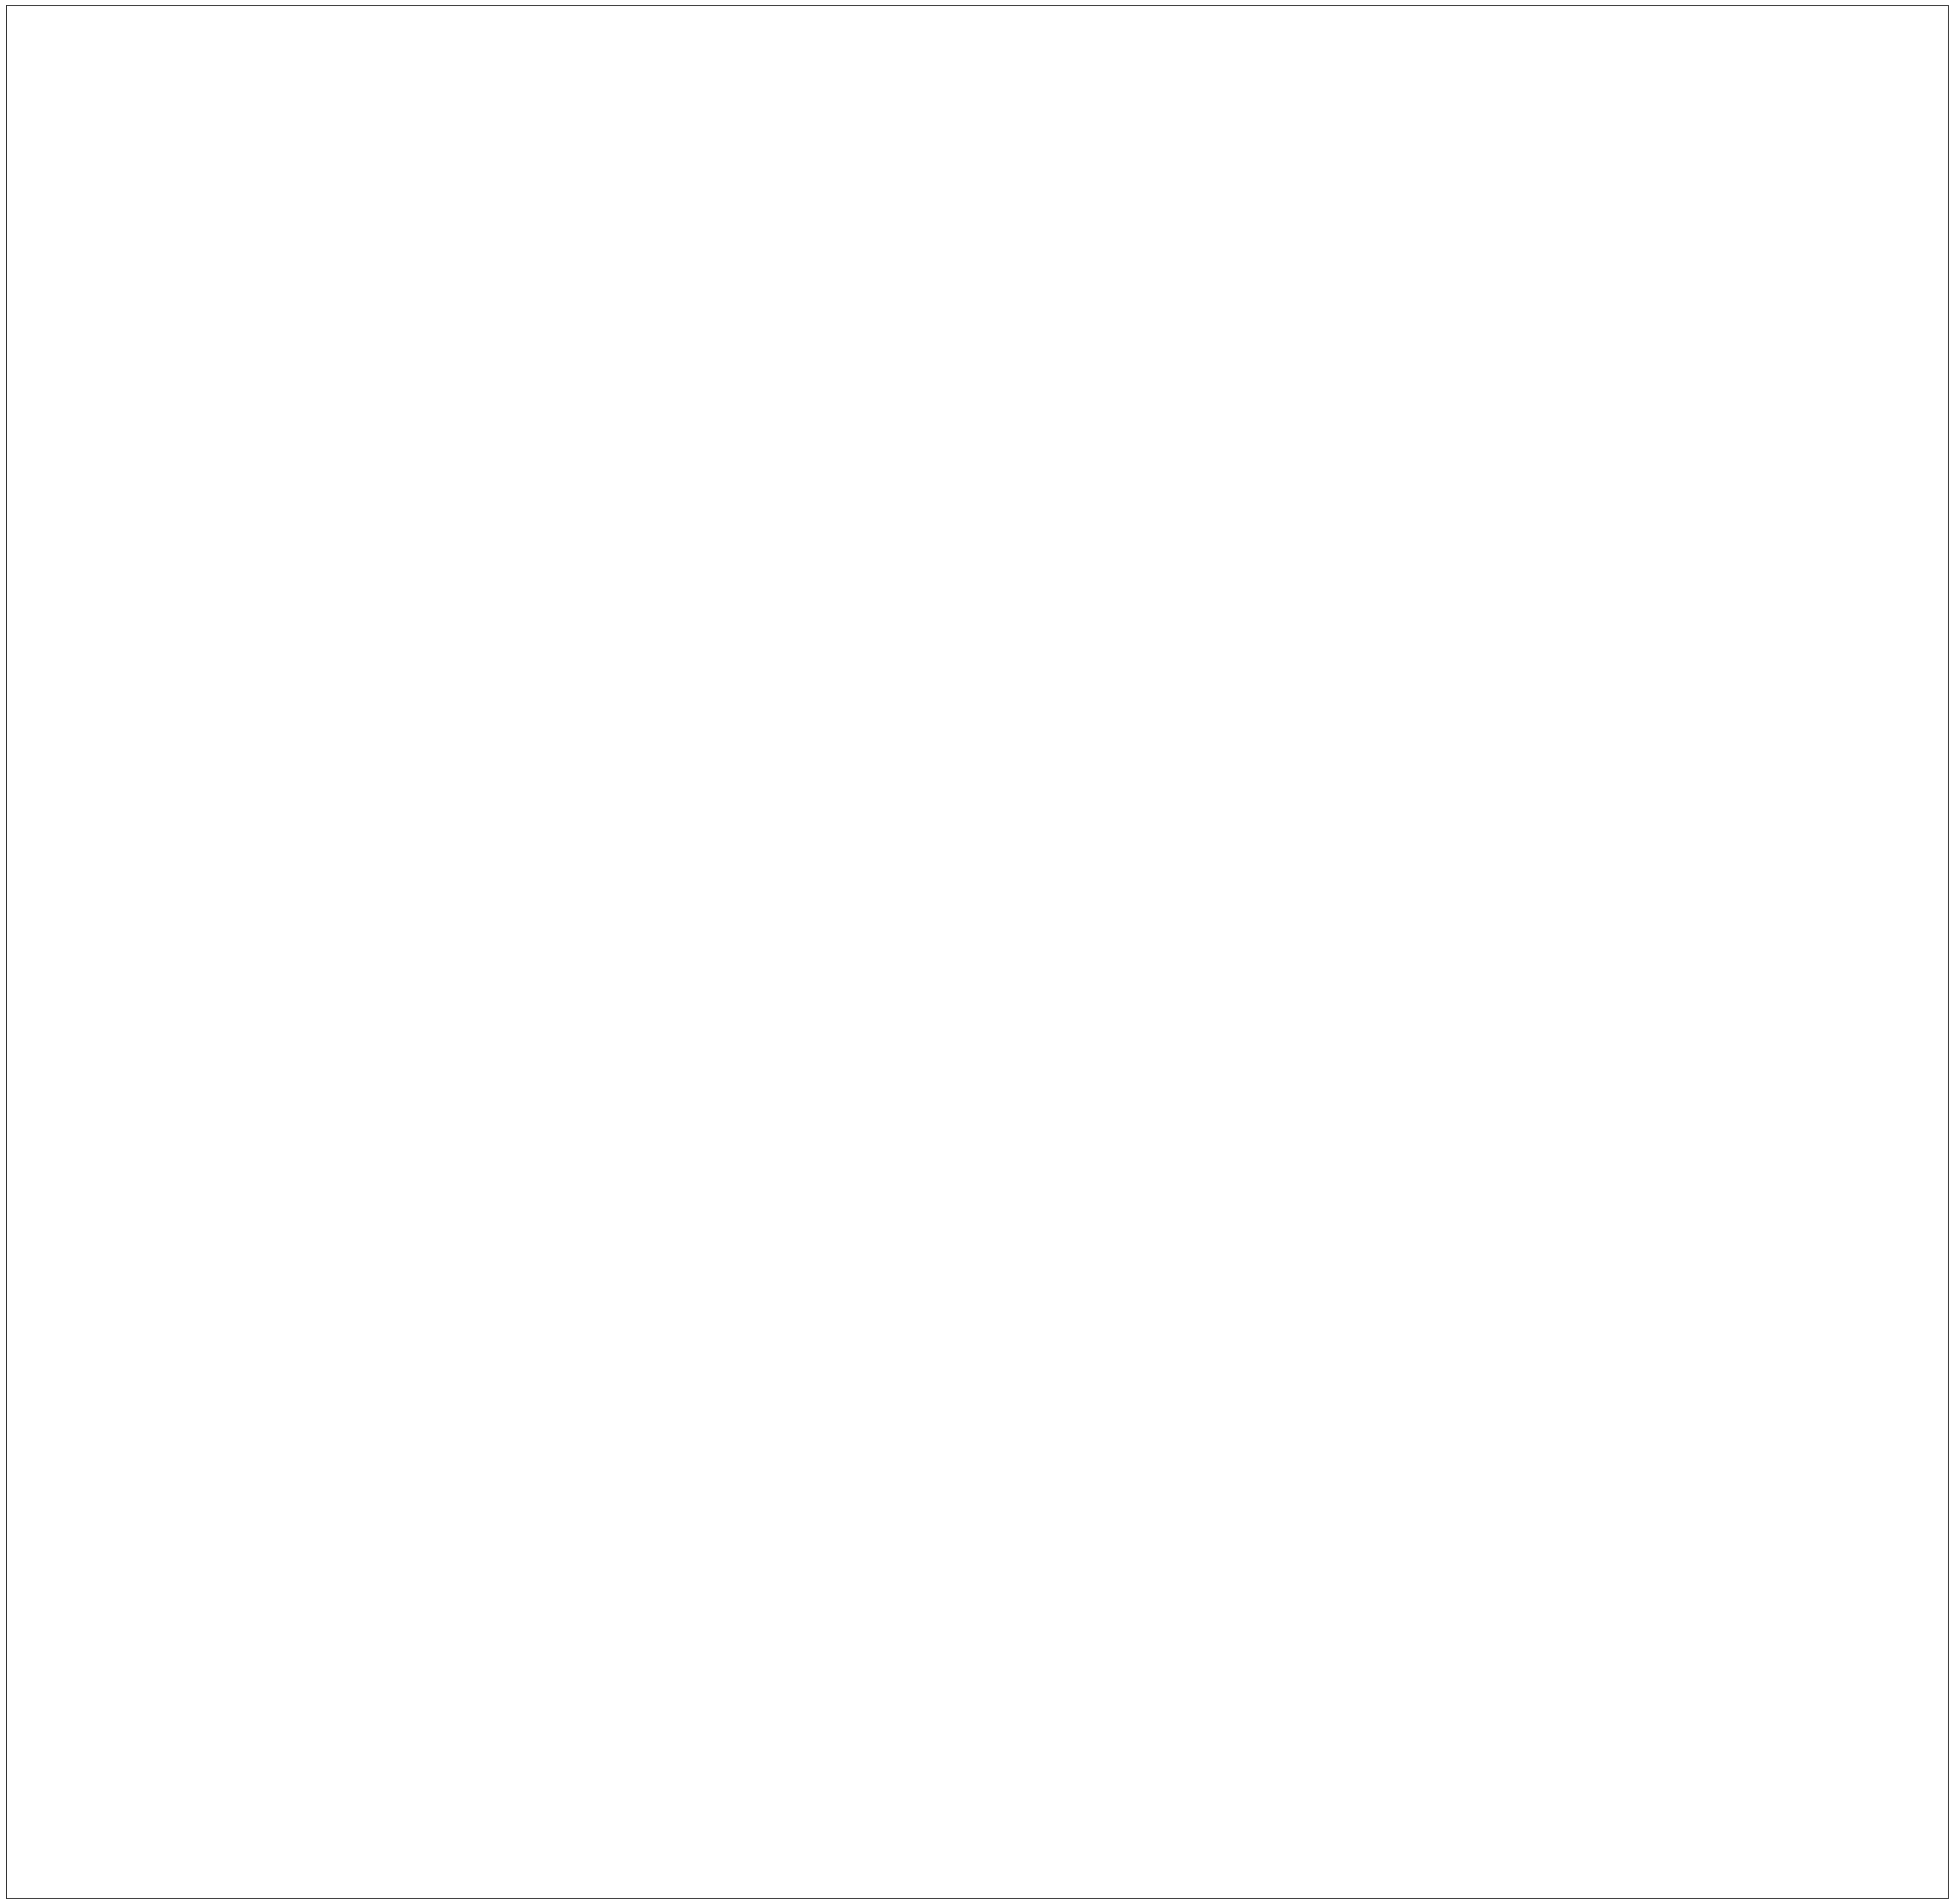

In [20]:
pos = nx.drawing.spring_layout(FG,k=0.70,iterations=60)
plt.figure(figsize=(40,40))
nx.draw_networkx(FG,pos=pos,edge_color='#FFDEA2',edge_width=1)

In [19]:
cliques = list(nx.find_cliques(FG))

In [20]:
clique_number = len(list(cliques))
print(clique_number)

46


In [21]:
sorted_cliques = sorted(list(cliques),key=len)

In [22]:
for clique in sorted_cliques:
    print(clique)

['如月蒼薇', 'Oleg Budnik']
['Sadanand A.M.', 'Ben Metz']
['Dusty Graham', 'Linda Baker']
['Kőszegi Ferenc', 'Waqas Khan']
['Pavel Sysuye', 'Alexandra Jelinek']
['Rachel Coleman', 'zeeshan Ahmad']
['Heru Sularto', 'sankar gurjar']
['ronald  a lee', 'Vic Sherman']
['Bob Rhome', 'Andrew Hull']
['amber saulic', 'RAVI RK']
['Robert Edwards', 'Laura Deady']
['Marco Magno', 'Amalya Gaziyeva']
['Lewis Small', 'Linette Ida']
['Mohammad Usmani', 'macnkat mcfie']
['Roberts Bernie', 'Jason Winget']
['Davis gayari', 'Ashton Marlow']
['April Davis', 'HSXin']
['Seobin Moon', 'Melissa Zaragoza']
['Jacquelyn Dorris', 'Angelique Archer (Angel)']
['Marouan Benzrak', 'william holcomb']
['Carlos J Valle', 'Tony Hill']
['javier godoy', 'oscar estraviz']
['ilhem ily', 'Prajot Mishra']
['Joel M', 'dawid michalik', 'Daniel Galeana']
['Krito Jimenez', 'Emile Ouellet', 'Irene Walden']
['lisa young', 'Andrew Wallace', 'Jamie Rhodes']
['Raymond Schmidt', 'Mychele Hamilton', 'Angel Ibarra']
['Wolfgang Graf', 'Giovanni

In [23]:
max_clique_nodes = set()

for nodelist in sorted_cliques[-6:-1]:
    for node in nodelist:
        max_clique_nodes.add(node)

In [24]:
max_clique = FG.subgraph(max_clique_nodes)
# max_clique = FG.subgraph(sorted_cliques[-1])
print(nx.info(max_clique))

Name: 
Type: Graph
Number of nodes: 50
Number of edges: 266
Average degree:  10.6400


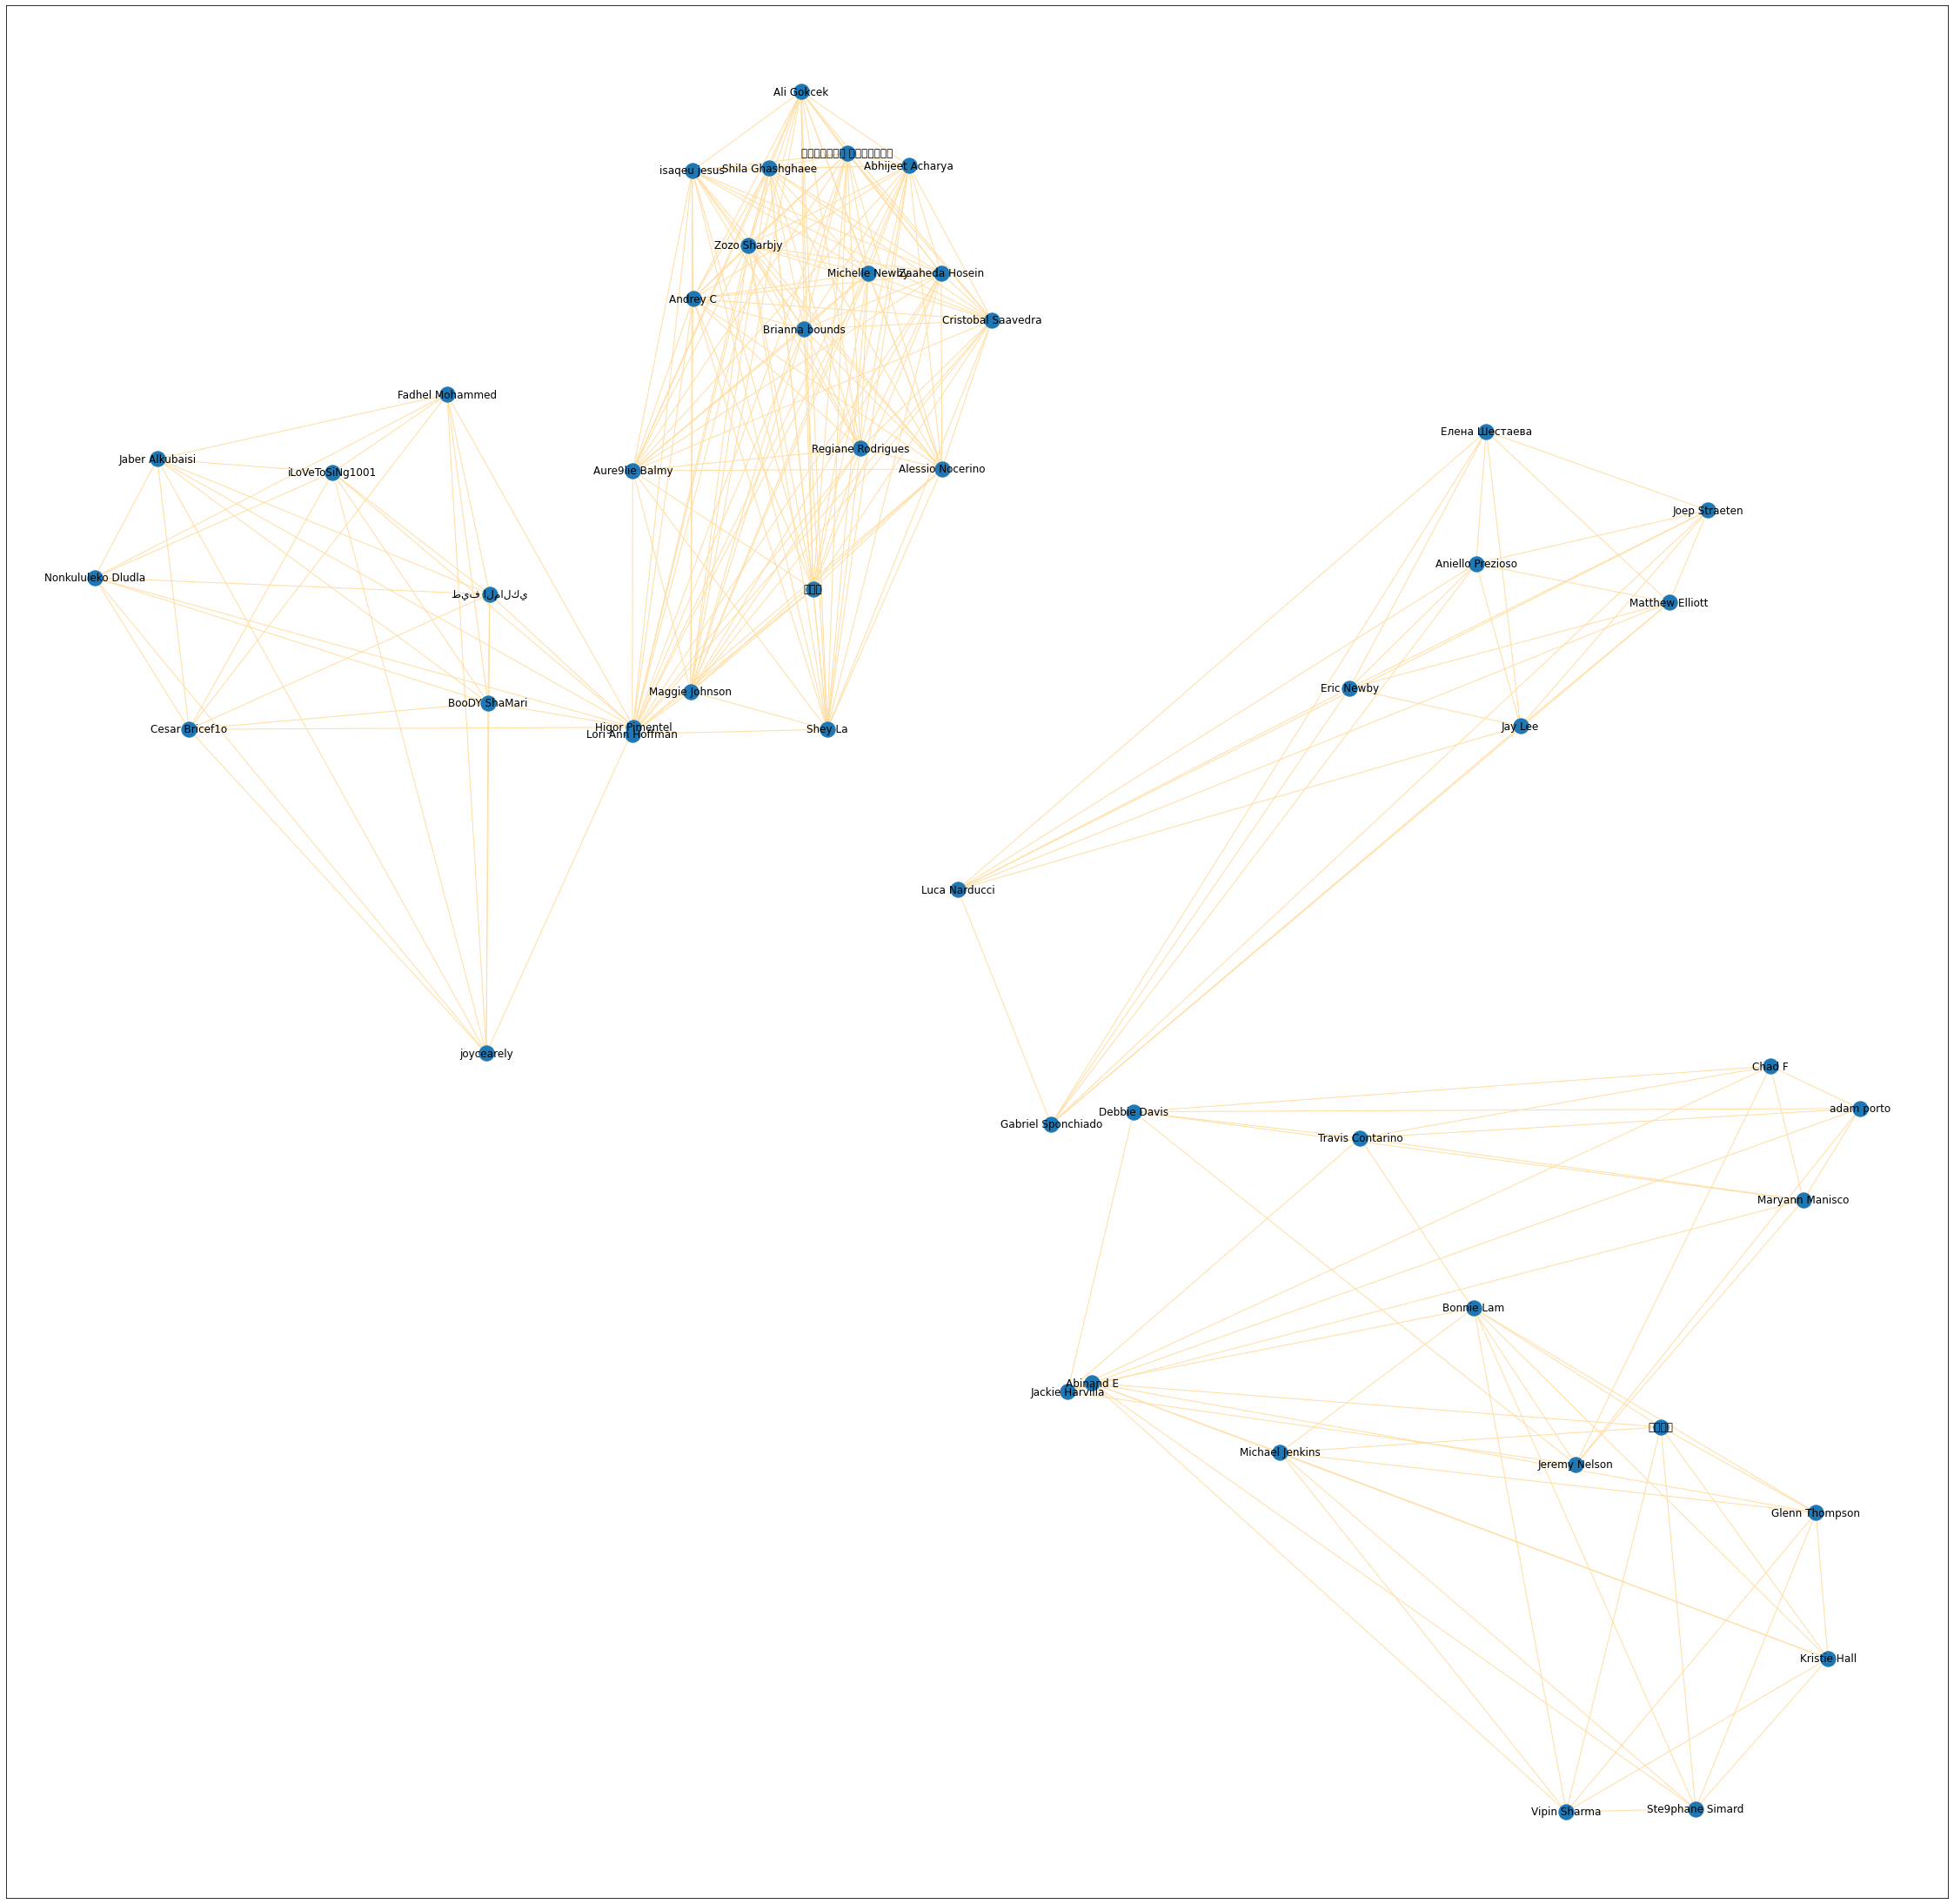

In [26]:
pos = nx.drawing.spring_layout(FG,k=0.70,iterations=60)
plt.figure(figsize=(40,40))
nx.draw_networkx(max_clique,pos=pos,edge_color='#FFDEA2',edge_width=1)

In [59]:
pipenv install python-louvain

  Created wheel for python-louvain: filename=python_louvain-0.14-py3-none-any.whl size=9294 sha256=596f5eaa131148f4549c25a3f893689d9b30694c6866d35f870f6c7515bbeeb5
  Stored in directory: c:\users\abdo\appdata\local\pip\cache\wheels\22\f9\ce\591ffa9b16851da50ca337c9ecfd44d79a7b87fcbd2a7a0021
Successfully built python-louvain



In [27]:
import community as community_louvain
import matplotlib.cm as cm

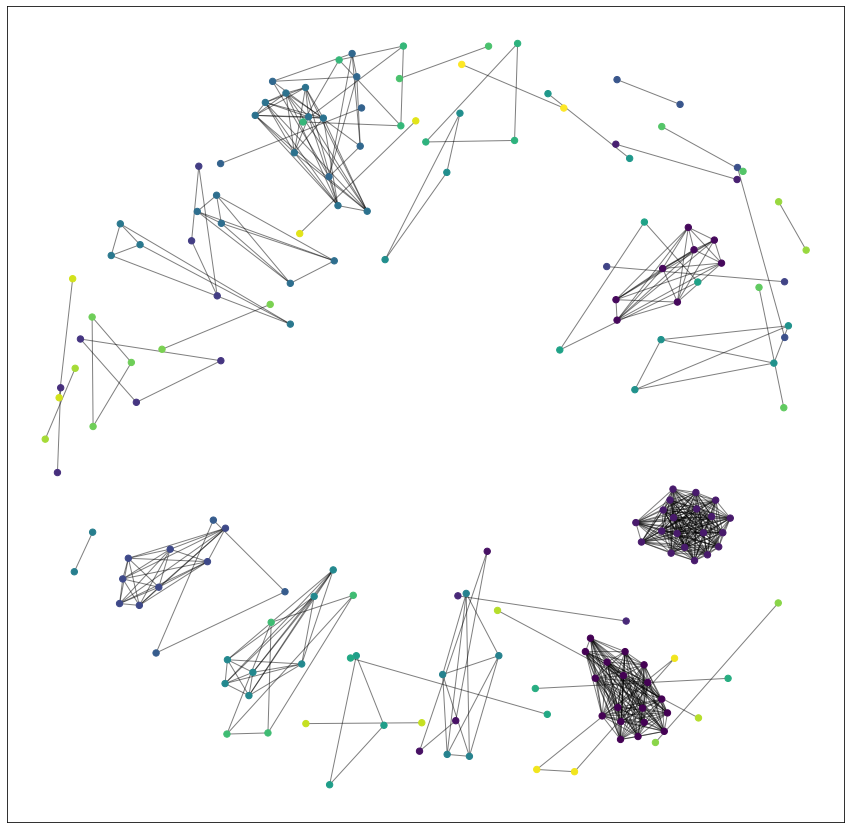

In [28]:
# compute the best partition
partition = community_louvain.best_partition(FG)

# draw the graph
plt.figure(figsize=(15,15))
pos = nx.spring_layout(FG,k=0.7,iterations=100)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(FG, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(FG, pos, alpha=0.5)
plt.show()